✅ Data Cleaning Complete!

📊 Dataset Summary:
           Height      Weight        Age  Grip strength
count  10.000000   10.000000  10.000000      10.000000
mean   68.600000  131.900000  32.500000      26.000000
std     1.670662   14.231811  12.860361       4.521553
min    65.800000  112.000000  17.000000      19.000000
25%    67.825000  120.750000  22.250000      22.500000
50%    68.450000  136.000000  29.500000      27.000000
75%    69.700000  141.750000  43.500000      29.750000
max    71.500000  153.000000  51.000000      31.000000


<ipython-input-1-c34af87db230>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Frailty'], y=df['Age'], palette="Set2")


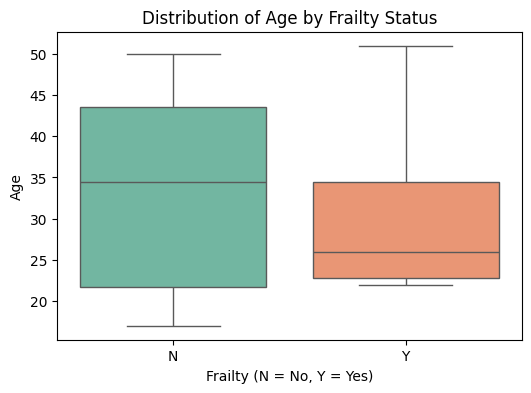

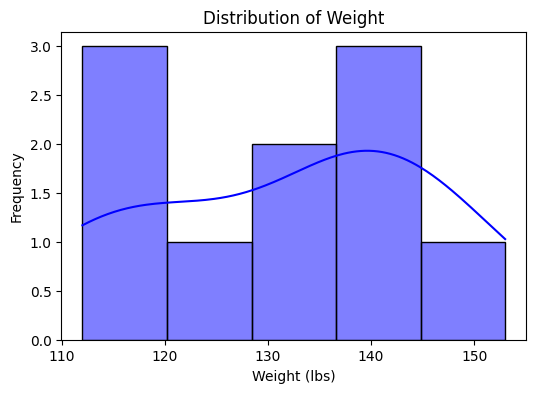

✅ EDA Complete!
✅ Data Ready for Modeling!


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# ------------------ Stage 1: Data Collection & Cleaning ------------------

# Create necessary directories
os.makedirs("data/cleaned", exist_ok=True)
os.makedirs("results/visualizations", exist_ok=True)

# Load dataset
data = {
    "Height": [65.8, 71.5, 69.4, 68.2, 67.8, 68.7, 69.8, 70.1, 67.9, 66.8],
    "Weight": [112, 136, 153, 142, 144, 123, 141, 136, 112, 120],
    "Age": [30, 19, 45, 22, 29, 50, 51, 23, 17, 39],
    "Grip strength": [30, 31, 29, 28, 24, 26, 22, 20, 19, 31],
    "Frailty": ["N", "N", "N", "Y", "Y", "N", "Y", "Y", "N", "N"]
}

df = pd.DataFrame(data)

# Clean column names
df.columns = df.columns.str.strip()

# Save cleaned data
df.to_csv("data/cleaned/frailty_data_cleaned.csv", index=False)
print("✅ Data Cleaning Complete!")

# ------------------ Stage 2: Exploratory Data Analysis (EDA) ------------------

# Summary statistics
print("\n📊 Dataset Summary:\n", df.describe())

# Box plot of Age vs. Frailty
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Frailty'], y=df['Age'], palette="Set2")
plt.xlabel("Frailty (N = No, Y = Yes)")
plt.ylabel("Age")
plt.title("Distribution of Age by Frailty Status")
plt.savefig("results/visualizations/age_vs_frailty_boxplot.png")
plt.show()

# Histogram of Weight Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['Weight'], bins=5, kde=True, color='blue')
plt.xlabel("Weight (lbs)")
plt.ylabel("Frequency")
plt.title("Distribution of Weight")
plt.savefig("results/visualizations/weight_histogram.png")
plt.show()

print("✅ EDA Complete!")

# ------------------ Stage 3: Model Preparation ------------------

# Encode categorical variable (Frailty: N → 0, Y → 1)
df['Frailty'] = df['Frailty'].map({'N': 0, 'Y': 1})

# Prepare dataset for model
X = df[['Height', 'Weight', 'Age', 'Grip strength']]
y = df['Frailty']

# Save processed data for modeling
df.to_csv("data/cleaned/frailty_data_final.csv", index=False)
print("✅ Data Ready for Modeling!")
